
# Анализ данных вакансий HH.ru 


*Данные получены из API HH.ru и представлены за 2024 год*


**Задача:** Выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков.

**Гипотеза:**
- в описаниях требований и характеристик Системного аналитика и Аналитика данных должны быть различияБ скорее всего в функционале и необходимых навыках 

**Необходимо изучить:**
1. Базовые различия:
2. Анализ грейдов специалистов
3. Описание типичного места работы
4. Описание типичного кандидата


**План исследования**
1. Предобработка данных.
2. Исследовательский анализ данных.
3. Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом.
4. Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик.
5. Определение типичного места работы для Аналитика данных и Системного аналитика по следующим параметрам: ТОП-работодателей, фзарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
6. Определение,  какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.
7. Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
8. Формулирование выводов и рекомендаций.



*Аналитик - Макарова Валерия*


## Импорт библиотек и данных

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter

sep = '-' * 30

In [2]:
df_sa = pd.read_excel('/Users/lera/Desktop/YP Master Project/vacancies_sa.xlsx')
df_da = pd.read_excel('/Users/lera/Desktop/YP Master Project/vacancies_da.xlsx')

In [3]:
def data_check(x):
    print('------------- Исходный датафрейм -------------')
    display(x.head())
    print('')
    print('')
    print('------------- Общая информация о датафрейме -------------')
    print('')
    print('')
    display(x.info())
    print('------------- Количество пустых значений в датафрейме -------------')
    print('')
    print('')
    display(x.isna().sum())
    print('------------- Количество явных дубликатов в датафрейме -------------')
    display(x.duplicated().sum())
    print('')
    print('')
    print('------------- Описательная статистика -------------')
    display(x.describe())

data = pd.concat([df_sa,df_da],keys=['Системный аналитик','Аналитик данных'] )
data.reset_index(level=0,inplace=True)
data.rename(columns={'level_0':'source'},inplace=True)
#проверим данные
data_check(data)

------------- Исходный датафрейм -------------


,source,id,name,published_at,alternate_url,type,employer,department,area,experience,...,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,Системный аналитик,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),...,Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,Системный аналитик,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),...,Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация
2,Системный аналитик,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),...,Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация
3,Системный аналитик,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),...,Удаленная работа,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация
4,Системный аналитик,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),...,Полный день,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN




------------- Общая информация о датафрейме -------------


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3716 entries, 0 to 1800
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   source                            3716 non-null   object        
 1   id                                3716 non-null   int64         
 2   name                              3716 non-null   object        
 3   published_at                      3716 non-null   datetime64[ns]
 4   alternate_url                     3716 non-null   object        
 5   type                              3716 non-null   object        
 6   employer                          3716 non-null   object        
 7   department                        882 non-null    object        
 8   area                              3716 non-null   object        
 9   experience                        3716 non-null   object

None

------------- Количество пустых значений в датафрейме -------------




source                                 0
id                                     0
name                                   0
published_at                           0
alternate_url                          0
type                                   0
employer                               0
department                          2834
area                                   0
experience                             0
key_skills                             0
schedule                               0
employment                             0
description                            0
description_lemmatized                 0
salary_from                         3012
salary_to                           3209
salary_bin                             0
key_skills_from_key_skills_field    1349
hard_skills_from_description        2728
soft_skills_from_description        1701
dtype: int64

------------- Количество явных дубликатов в датафрейме -------------


0



------------- Описательная статистика -------------


,id,salary_from,salary_to
count,3.716000e+03,704.000000,507.000000
mean,9.871115e+07,132074.703125,192250.138067
std,4.487852e+06,72442.604165,106554.774630
min,5.241017e+07,50.000000,20000.000000
25%,9.615992e+07,75000.000000,100000.000000
50%,9.919396e+07,120000.000000,180000.000000
75%,1.023756e+08,181750.000000,280000.000000
max,1.035847e+08,398000.000000,580000.000000


## Предобработка данных

Статус по данным до предобработки:

- id - не трогаем
- name - не трогаем
- published_at - формат datetime64[ns] нас устраивает, но хотелось бы добавить отдельные колонки для месяца и дня недели
- alternate_url - не трогаем
- type - проверяем неявные дубликаты, пропусков нет
- employer - проверяем неявные дубликаты, пропусков нет
- department - проверяем неявные дубликаты, пропуски надо проанализировать
- area - пропусков нет, проверяем неявные дубликаты
- experience - пропусков нет, проверяем неявные дубликаты
- key_skills - вложенный список - пропусков нет, проверить дубликаты не имеет смысла 
- schedule - пропусков нет, проверяем неявные дубликаты
- employment - пропусков нет, проверяем неявные дубликаты
- description - не трогаем
- description_lemmatized - не трогаем
- salary_from - есть пропуски, посмотреть, есть ли смысл заполнять медианными значениями
- salary_to - есть пропуски, посмотреть, есть ли смысл заполнять медианными значениями
- salary_bin - пропусков нет, но необходимо проверить категории 
- key_skills_from_key_skills_field - есть пропуски, проверить, можно ли иначе выбрать ключевые навыки, поскольку поле автоматически генерируется
- hard_skills_from_description - есть пропуски, проверить, можно ли иначе выбрать ключевые навыки, поскольку поле автоматически генерируется
- soft_skills_from_description - есть пропуски, проверить, можно ли иначе выбрать ключевые навыки, поскольку поле автоматически генерируется

Явных дубликатов мы не обнаружили, поэтому поищем неявные.

**План предобработки:**

1. Устранение неявных дубликатов (при наличии)
    1. Проверяем уникальные значения категориальных данных
    2. Если есть "списки" внутри категорий сделаем столбцы с определяющим элементом списка
       посмотрим столбцы: 
        - 'type'
        - 'employer'
        - 'department'
        - 'area'
        - 'experience'
        - 'schedule'
        - 'employment'
        
2. Устранение пропусков в столбцах (при необходимости):
    - 'department',
    - 'salary_from',
    - 'salary_to',
    - 'key_skills_from_key_skills_field',
    - 'hard_skills_from_description'
    - 'soft_skills_from_description' 
    
3. Проверяем корректное распределение категорий в столбце 'salary_bin', если получится заполнить пропуски
4. Добавляем новые колонки

### Работа с неявными дубликатами

In [4]:
print('Уникальные значения столбца:')
display(data['type'].unique())
print('Кол-во уникальных значений:')
data['type'].nunique()

Уникальные значения столбца:


array(['Открытая'], dtype=object)

Кол-во уникальных значений:


1

In [5]:
print('Уникальные значения столбца:')
display(data['employer'].unique())
print('Кол-во уникальных значений:')
data['employer'].nunique()

Уникальные значения столбца:


array(['Юрент', 'Surf', 'AMarkets', ..., 'the_covert', 'R1 Девелопмент',
       'Почта России'], dtype=object)

Кол-во уникальных значений:


1358

In [6]:
print('Уникальные значения столбца:')
display(data['department'].unique())
print('Кол-во уникальных значений:')
data['department'].nunique()

Уникальные значения столбца:


array([nan, 'ГК Иннотех | Финтех (Иннотех)',
       'Simple. Дирекция по информационным технологиям',
       '«Останкинский мясоперерабатывающий холдинг», Центральный офис',
       'ГЛОРИЯ ДЖИНС. IT', 'Сбер для экспертов', 'ДИКСИ. IT',
       'Ozon Информационные технологии', 'МТС Банк. IT',
       'ГК Иннотех | Мультипродакт', 'ИК "Сибинтек"', 'Сбер. IT',
       'Лента, федеральная розничная сеть, IT ', 'МегаФон, Офис',
       'BI.ZONE Направление Разработка',
       'Компания «СПОРТМАСТЕР», Sportmaster Lab',
       'ГК Иннотех | Большие данные', 'ПАО ВТБ, Технологический блок',
       ' Информационные технологии', 'Fix Price. IT', 'Газпромбанк',
       'БКС Банк IT & Digital', 'ПИК', '«Передовые Платежные Решения» IT',
       'БКС IT & Digital', '«МТС», Digital',
       'ГК Иннотех | Интеграция Консалтинг', 'Сибур',
       'билайн: ИТ, Data, Digital', 'ПАО «Промсвязьбанк», ИТ',
       '«РОСБАНК»', '«Филип Моррис Интернэшнл» в России, IT',
       'Sminex Информационные технологии', 'б

Кол-во уникальных значений:


129

In [7]:
print('Уникальные значения столбца:')
display(data['area'].unique())
print('Кол-во уникальных значений:')
data['area'].nunique()

Уникальные значения столбца:


array(['Москва', 'Санкт-Петербург', 'Апатиты', 'Екатеринбург', 'Курск',
       'Новосибирск', 'Пермь', 'Ростов-на-Дону', 'Краснодар', 'Ижевск',
       'Геленджик', 'Казань', 'Воронеж', 'Калининград', 'Владивосток',
       'Челябинск', 'Нижний Новгород', 'Белгород', 'Рубцовск',
       'Кольчугино', 'Томск', 'Омск', 'Смоленск', 'Калуга', 'Тверь',
       'Тюмень', 'Кострома', 'Тольятти', 'Майкоп', 'Сочи', 'Оренбург',
       'Саратов', 'Кемерово', 'Пенза', 'Уфа', 'Самара', 'Липецк',
       'Ставрополь', 'Хасавюрт', 'Иваново (Ивановская область)',
       'Вологда', 'Йошкар-Ола', 'Рязань', 'Владимир', 'Тамбов', 'Орел',
       'Тула', 'Красноярск', 'Киров (Кировская область)', 'Ульяновск',
       'Красногорск', 'Сургут', 'Белорецк', 'Ярославль', 'Брянск',
       'Чебоксары', 'Волгоград', 'Адлер', 'Саранск', 'Набережные Челны',
       'Севастополь', 'Мытищи', 'Дзержинск (Нижегородская область)',
       'Иннополис', 'Хабаровск', 'Таганрог', 'Иркутск', 'Улан-Удэ',
       'Петрозаводск', 'Магнито

Кол-во уникальных значений:


106

In [8]:
print('Уникальные значения столбца:')
display(data['experience'].unique())
print('Кол-во уникальных значений:')
data['experience'].nunique()

Уникальные значения столбца:


array(['Middle (3-6 years)', 'Junior+ (1-3 years)', 'Senior (6+ years)',
       'Junior (no experince)'], dtype=object)

Кол-во уникальных значений:


4

In [9]:
print('Уникальные значения столбца:')
display(data['schedule'].unique())
print('Кол-во уникальных значений:')
data['schedule'].nunique()

Уникальные значения столбца:


array(['Полный день', 'Удаленная работа', 'Гибкий график',
       'Сменный график'], dtype=object)

Кол-во уникальных значений:


4

In [10]:
print('Уникальные значения столбца:')
display(data['employment'].unique())
print('Кол-во уникальных значений:')
data['employment'].nunique()

Уникальные значения столбца:


array(['Полная занятость', 'Стажировка', 'Частичная занятость',
       'Проектная работа'], dtype=object)

Кол-во уникальных значений:


4

**Итого по неявным дубликатам:**
 - 'type' - есть только открытые вакансии, ничего не трогаем
 - 'employer' - у нас 1358 уникальных наименований работодателя, была произведена попытка чистки неявных дубликатов через изменение регистра и удаление общих слов в наименовании *(по типу "банк", "головная организация" и т.д.)*, но она действительно ни к чему не привела - считаем, что список уникальный
 - 'department' - 129 уникальных значений типа "работодатель, департамент". В некоторых случаях департамент не указан, также наименования департаментов различаются от компании к компании, не вижу смысла выделять департамент и чистить список
 - 'area' - 106 уникальных наименований городов, неявных дубликатов нет
 - 'experience' - 4 уникальных значения, дубликатов нет
 - 'schedule' - 4 уникальных значения, дубликатов нет
 - 'employment' - 4 уникальных значения, дубликатов нет

**Внесения правок по результатам проверки неявных дубликатов не требуется**

###  Устранение пропусков

- 'department' - после работы с дубликатами уже выяснили, что названия департаментов уникальны и пропуски там нет смысла заполнять значением "не указано" несмотря на то, что их 76%
- 'salary_from' + 'salary_to' - у нас 81% пропусков в колонке salary_from и 86% пропусков в колонке salary_to, посмотрим можно ли какие-то пороги выцепить из salary_bin или из грейдов
- 'key_skills_from_key_skills_field'
- 'hard_skills_from_description'
- 'soft_skills_from_description'

In [11]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('Reds')

,0
source,0.000000
id,0.000000
name,0.000000
published_at,0.000000
alternate_url,0.000000
type,0.000000
employer,0.000000
department,76.000000
area,0.000000
experience,0.000000


####  закрываем пропуски salary_from и salary_to

1. Сначала посмотрим на грейды, поскольку это более логичный старт для поиска пропусков в ЗП.
2. Далее будем смотреть на зарплатную категорию на случай, если работодатель при заполнении объявления указал категорию, но не прописал пороги

In [12]:
grade_money = data.pivot_table(index = 'experience', values=['salary_from','salary_to'], 
                               aggfunc = ('count','median','mean'))
grade_money

salary_from                          salary_to  \
                            count           mean    median     count   
experience                                                             
Junior (no experince)         100   64903.950000   60500.0        72   
Junior+ (1-3 years)           382  112828.280105  100000.0       233   
Middle (3-6 years)            210  195521.490476  200000.0       193   
Senior (6+ years)              12  194190.000000  200000.0         9   

                                                
                                mean    median  
experience                                      
Junior (no experince)   85861.750000   80000.0  
Junior+ (1-3 years)    153398.626609  140000.0  
Middle (3-6 years)     272160.072539  280000.0  
Senior (6+ years)      335555.555556  340000.0

In [13]:
data.query('salary_from.isna() or salary_to.isna()')['experience'].value_counts()

Junior+ (1-3 years)      1775
Middle (3-6 years)       1367
Junior (no experince)     172
Senior (6+ years)          49
Name: experience, dtype: int64

Получается, что статистически значимые данные есть только по уровням зарплат джуниоров с опытом 1-3 года и мидлов.

Можем обозначить корзину 100-140 для опытных джунов и 200-280 для мидлов, но кол-во пропусков составляет более 70% по первой группе и около 80% по второй, поэтому считаю некорректным заполнять медианами зарплаты в этих группах.

При этом, по группе джунов без опыта есть понимание, что минимальный порог указан по большинству участников, поэтому можем считать, что МРОТ у нас будет на уровне 60к

In [14]:
data['salary_bin'].unique()

array(['ЗП не указана', 'От 100 тысяч до 200 тысяч', 'Меньше 100 тысяч',
       'Больше 300 тысяч', 'От 200 тысяч до 300 тысяч'], dtype=object)

In [15]:
#заполним пропуски значений минимальной и максимальной зп по корзинам

#назначаем значения для корзин
min_salary_value = {
    'От 100 тысяч до 200 тысяч':100000, 
    'От 200 тысяч до 300 тысяч':200000,
    'Больше 300 тысяч':300000,
    'Меньше 100 тысяч':60000 #потому что мы установили такой МРОТ по результатам анализа грейдов
}
max_salary_value = {
    'От 100 тысяч до 200 тысяч':200000, 
    'От 200 тысяч до 300 тысяч':300000,
    'Меньше 100 тысяч':100000,
}
#заполним минимальные значения
for category, value in min_salary_value.items():
    data.loc[(data['salary_bin'] == category) & (data['salary_from'].isna()), 'salary_from'] = value
#заполним максимальные значения
for category, value in max_salary_value.items():
    data.loc[(data['salary_bin'] == category) & (data['salary_to'].isna()), 'salary_to'] = value

#проверяем заполнение
data.query('salary_from.isna() or salary_to.isna()')['salary_bin'].value_counts()

ЗП не указана    3209
Name: salary_bin, dtype: int64

In [16]:
# Функция для исправления значений из сокращенных в тысячи
def correct_salary(salary):
    salary_str = str(salary).strip()  # Преобразуем значение в строку для подсчета символов
    if salary < 1000: 
        return salary * 1000
    else:
        return salary

# Применение функции к колонке 'salary'
data['salary_from'] = data['salary_from'].apply(correct_salary)
data['salary_to'] = data['salary_to'].apply(correct_salary)

# Результат
print(data.describe())

                 id    salary_from      salary_to
count  3.716000e+03     858.000000     507.000000
mean   9.871115e+07  139382.588578  192250.138067
std    4.487852e+06   76737.586056  106554.774630
min    5.241017e+07   20000.000000   20000.000000
25%    9.615992e+07   80000.000000  100000.000000
50%    9.919396e+07  120000.000000  180000.000000
75%    1.023756e+08  200000.000000  280000.000000
max    1.035847e+08  398000.000000  580000.000000


#### Пробуем выделить дополнительные значения в столбец 'key_skills_from_key_skills_field'

Разобьем поле key_skills по списку и заполним пустые ячейки

In [17]:
print('Кол-во уникальных значений поля key_skills:')
display(data['key_skills'].nunique())
print('Кол-во уникальных значений поля key_skills_from_key_skills_field:')
data['key_skills_from_key_skills_field'].nunique()

Кол-во уникальных значений поля key_skills:


1899

Кол-во уникальных значений поля key_skills_from_key_skills_field:


1795

In [18]:
data['key_skills_list']=data['key_skills'].apply(lambda x: x.split(",") if isinstance(x, str) else x)
data['key_skills_list']

0       [['1С',  'Аналитический склад ума',  'confluen...
1       [['Разработка технических заданий',  'Бизнес-а...
2                                      [['Документация']]
3       [['ERP',  'Atlassian Jira',  '1С: Управление П...
4       [['JSON',  'SQL',  'XML',  'SOAP',  'HTML',  '...
                              ...                        
1796    [['Проактивность',  'Коммуникация',  'SQL',  '...
1797    [['Грамотная речь',  'Сводные таблицы',  'Сбор...
1798    [['Анализ данных',  'SQL',  'MS Power BI',  'P...
1799    [['Анализ данных',  'SQL',  'MS Power BI',  'P...
1800    [['Анализ данных',  'SQL',  'MS Power BI',  'P...
Name: key_skills_list, Length: 3716, dtype: object

In [19]:
#объединим все списки с навыками, чтобы посчитать кол-во упоминаний каждого
all_skills = sum(data['key_skills_list'],[])
skill_counts = Counter(all_skills)
skill_counts.most_common()

[(" 'SQL'", 1042),
 (" 'Документация'", 1036),
 (" 'BPMN'", 560),
 (" 'Python'", 549),
 (" 'UML'", 535),
 ('[]', 512),
 (" 'confluence'", 405),
 (" 'Системный анализ'", 323),
 ("['Анализ данных'", 322),
 (" 'Аналитическое мышление'", 301),
 (" 'REST'", 270),
 (" 'SOAP'", 262),
 (" 'Аналитическое мышление']", 256),
 ("['Документация']", 255),
 (" 'Коммуникация'", 245),
 (" 'Аналитика'", 241),
 (" 'Системный анализ']", 231),
 (" 'Работа с базами данных'", 228),
 ("['SQL'", 219),
 (" 'Работа с большим объемом информации'", 199),
 (" 'Бизнес-анализ'", 194),
 ("['confluence'", 194),
 (" 'Power BI'", 194),
 (" 'XML'", 184),
 (" 'SQL']", 168),
 (" 'API'", 168),
 (" 'Анализ данных'", 162),
 (" 'Постановка задач разработчикам'", 160),
 (" 'MS Excel'", 150),
 ("['Разработка технических заданий'", 149),
 (" 'Документация']", 143),
 (" 'Atlassian Jira'", 137),
 ("['Документация'", 137),
 (" 'Pandas'", 130),
 (" 'Коммуникация']", 128),
 (" 'Сбор и анализ информации'", 123),
 (" 'Базы данных']", 121

Итак, заметные проблемы с описанием навыков:
1. Неявные дубликаты - например, наименования 'SQL' и ['SQL' - заменим, и приведем к нижнему регистру
2. Даже грязные списки уже выглядят сильно полнее текущих данных в колонках хард/софт скиллов. Необходимо выделить топ навыков, которые мы соберем в словарь хард/софт скиллов, чтобы после вытянуть новые столбцы с этими данными (считаю, что необходимо брать статистически значимые (5%) навыки - упоминание более 150 раз или топ-10)

In [20]:
def clean_skills (skill_list):
    return [skill.strip("[]' : \"").lower() for skill in skill_list if skill.strip("[]' : \"")]

data['key_skills_list2'] = data['key_skills_list'].apply(clean_skills)  
    
#объединим все списки с навыками, чтобы посчитать кол-во упоминаний каждого
all_skills2 = sum(data['key_skills_list2'],[])
skill_counts2 = Counter(all_skills2)
skill_counts2.most_common()

[('документация', 1571),
 ('sql', 1438),
 ('confluence', 699),
 ('аналитическое мышление', 658),
 ('bpmn', 656),
 ('python', 629),
 ('системный анализ', 576),
 ('uml', 574),
 ('анализ данных', 487),
 ('коммуникация', 461),
 ('rest', 394),
 ('pandas', 330),
 ('работа с базами данных', 267),
 ('soap', 266),
 ('аналитика', 264),
 ('разработка технических заданий', 253),
 ('работа с большим объемом информации', 233),
 ('power bi', 231),
 ('бизнес-анализ', 227),
 ('ms excel', 226),
 ('постановка задач разработчикам', 216),
 ('базы данных', 215),
 ('xml', 212),
 ('ms sql', 212),
 ('api', 192),
 ('postgresql', 181),
 ('atlassian jira', 159),
 ('json', 152),
 ('atlassian confluence', 138),
 ('data analysis', 131),
 ('сбор и анализ информации', 128),
 ('аналитические исследования', 123),
 ('json api', 119),
 ('математическая статистика', 111),
 ('проактивность', 105),
 ('kafka', 97),
 ('tableau', 95),
 ('моделирование бизнес процессов', 91),
 ('rest api', 87),
 ('scrum', 86),
 ('dwh', 84),
 ('e

Итого список наиболее востребованных хард-скиллов:
1. документация
2. sql
3. confluence
4. bpmn
5. python
6. системный анализ
7. uml
8. анализ данных
9. rest
10. pandas
11. soap
12. аналитика
13. разработка технических заданий
14. работа с большим объемом информации
15. power bi
16. бизнес-анализ
17. ms excel
18. базы данных
19. xml
20. ms sql
21. api
22. postegresql
23. atlassian jira
24. json

Список софтов:
1. аналитическое мышление
2. коммуникация
3. аналитика
4. постановка задач разработчикам
5. проактивность
6. английский язык
7. переговоры
8. работа в команде
9. деловая коммуникация
10. аналитический склад ума  

In [21]:
#создадим новые колонки с хардами и софтами
hard_skills = ['документация','sql', 'confluence', 'bpmn', 'python', 'системный анализ', 'uml', 'анализ данных','rest', 'pandas', 'soap', 'аналитика','разработка технических заданий', 'работа с большим объемом информации','power bi', 'бизнес-анализ', 'ms excel', 'базы данных','xml', 'ms sql', 'api', 'postegresql', 'atlassian jira','json']
soft_skills = ['аналитическое мышление','коммуникация','аналитика','постановка задач разработчикам','проактивность','английский язык','переговоры','работа в команде','деловая коммуникация','аналитический склад ума']

def find_hard_skills(skill_list):
    return [skill for skill in 
            skill_list if skill in hard_skills]

def find_soft_skills(skill_list):
    return [skill for skill in 
            skill_list if skill in soft_skills]
    
data['hard_skills'] = data['key_skills_list2'].apply(find_hard_skills)
data['soft_skills'] = data['key_skills_list2'].apply(find_soft_skills)

data.head()

,source,id,name,published_at,alternate_url,type,employer,department,area,experience,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,key_skills_list,key_skills_list2,hard_skills,soft_skills
0,Системный аналитик,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN,"[['1С', 'Аналитический склад ума', 'confluen...","[1с, аналитический склад ума, confluence, sql]","[confluence, sql]",[аналитический склад ума]
1,Системный аналитик,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация,"[['Разработка технических заданий', 'Бизнес-а...","[разработка технических заданий, бизнес-анализ...","[разработка технических заданий, бизнес-анализ...","[английский язык, деловая коммуникация]"
2,Системный аналитик,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация,[['Документация']],[документация],[документация],[]
3,Системный аналитик,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация,"[['ERP', 'Atlassian Jira', '1С: Управление П...","[erp, atlassian jira, 1с: управление производс...","[atlassian jira, confluence]",[коммуникация]
4,Системный аналитик,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN,"[['JSON', 'SQL', 'XML', 'SOAP', 'HTML', '...","[json, sql, xml, soap, html, js, java, css, c#]","[json, sql, xml, soap]",[]


Итого, мы можем скипануть автоматическое определение навыков, выделили сами то, что нам нужно в отдельные новые столбцы.

###  Проверка категорий

Пропуски заполнять мы не стали, поэтому считаем категории корректными

###  Добавляем новые столбцы

Для анализа размещенных вакансий добавим столбцы с временем


In [22]:
#　добавляем столбцы
data['m'] = data['published_at'].dt.month
data['wd'] = data['published_at'].dt.dayofweek 

# поменяем содержимое столбца с днями недели
days_mapping = {
    0: 'пн',  
    1: 'вт',  
    2: 'ср',  
    3: 'чт',  
    4: 'пт',  
    5: 'сб',  
    6: 'вс'  
}
data['wd'] = data['wd'].replace(days_mapping)

###   Чистка датафрейма

Нам объективно больше не нужны некоторые поля, поэтому немного наведем красоту:

In [23]:
data = data.drop(labels=['alternate_url',
                         'department',
                         'type',
                         'key_skills',
                         'description',
                         'description_lemmatized',
                         'key_skills_from_key_skills_field',
                         'hard_skills_from_description',
                         'soft_skills_from_description',
                         'key_skills_list'], axis=1)
data.rename(columns={'key_skills_list2': 'key_skills'}, inplace=True)

data.head()

,source,id,name,published_at,employer,area,experience,schedule,employment,salary_from,salary_to,salary_bin,key_skills,hard_skills,soft_skills,m,wd
0,Системный аналитик,100046399,Системный аналитик,2024-07-08 10:22:57,Юрент,Москва,Middle (3-6 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"[1с, аналитический склад ума, confluence, sql]","[confluence, sql]",[аналитический склад ума],7,пн
1,Системный аналитик,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,Surf,Санкт-Петербург,Junior+ (1-3 years),Удаленная работа,Полная занятость,NaN,NaN,ЗП не указана,"[разработка технических заданий, бизнес-анализ...","[разработка технических заданий, бизнес-анализ...","[английский язык, деловая коммуникация]",7,сб
2,Системный аналитик,100059559,Системный IT аналитик,2024-07-08 11:48:17,AMarkets,Москва,Junior+ (1-3 years),Полный день,Полная занятость,233750.0,NaN,ЗП не указана,[документация],[документация],[],7,пн
3,Системный аналитик,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,Астор,Москва,Senior (6+ years),Удаленная работа,Полная занятость,NaN,NaN,ЗП не указана,"[erp, atlassian jira, 1с: управление производс...","[atlassian jira, confluence]",[коммуникация],7,вт
4,Системный аналитик,100064793,Системный аналитик,2024-07-08 16:39:40,Зетта Страхование,Москва,Junior+ (1-3 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"[json, sql, xml, soap, html, js, java, css, c#]","[json, sql, xml, soap]",[],7,пн


**---------------- Вывод по итогам раздела Предобработка данных: ----------------**

1. Неявных дубликатов в категориальных данных не оказалось, но оказались в списках навыков - список вычистили и на его базе составили новые столбцы с сигнификаторами ключевых хард-/софт-скиллов
2. Пропуски заполнии частично для зарплат - минимальным порогом в 60к. Остальные пропуски оказались достаточно материальны, чтобы отказаться от усреднения данных по меньшинству

В остальном качество данных вполне сносное - пропусков мало, явных дубликатов не было, неявные устранить вполне комфортно.

## Исследовательский анализ данных

### Общие наблюдения

Дано:

In [24]:
print('Период анализа:')
print(data['published_at'].min(),'-',data['published_at'].max())
print(sep)
print('Общее кол-во вакансий:', data['id'].nunique())
print(sep)
print('Количество вакансий по позиции:')
print(data['source'].value_counts())
print(sep)
print('Количество работодателей:')
print(data['employer'].nunique())


Период анализа:
2024-02-13 21:45:51 - 2024-07-09 12:47:11
------------------------------
Общее кол-во вакансий: 3711
------------------------------
Количество вакансий по позиции:
Системный аналитик    1915
Аналитик данных       1801
Name: source, dtype: int64
------------------------------
Количество работодателей:
1358


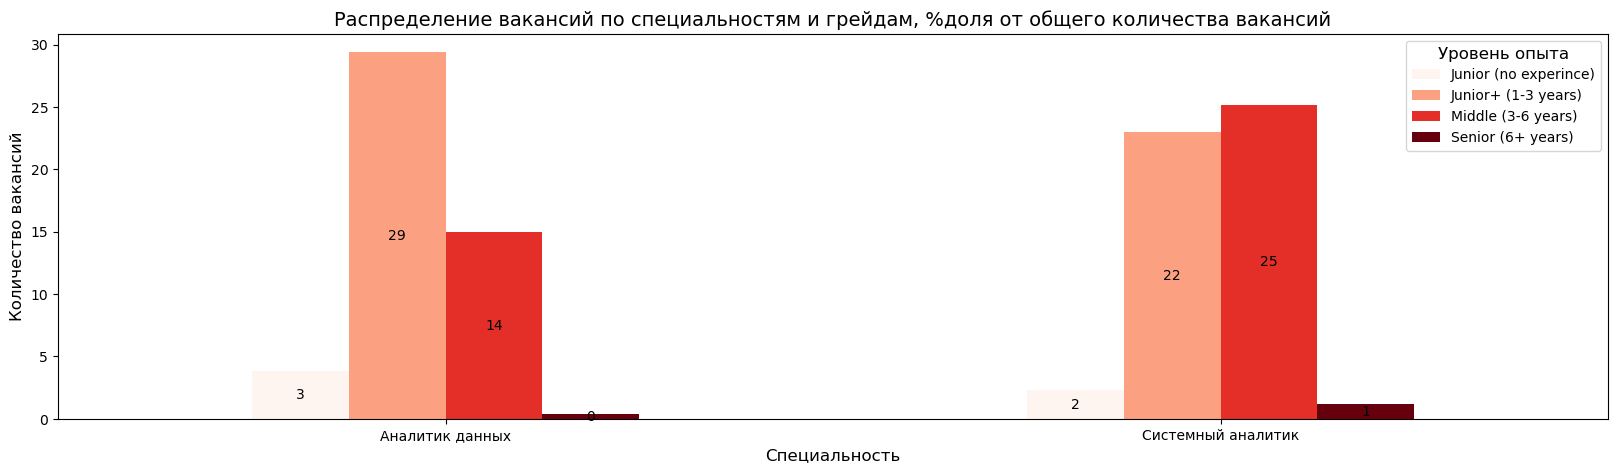

In [25]:
# сгруппируем вакансии по специальностям и грейдам:
data_group_grade = data.groupby(['source', 'experience']).size().unstack()/3711*100

ax = data_group_grade.plot(kind='bar', figsize=(20, 5), cmap = 'Reds')

plt.title('Распределение вакансий по специальностям и грейдам, %доля от общего количества вакансий', fontsize=14)
plt.xlabel('Специальность', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
ax.legend(title='Уровень опыта', fontsize=10, title_fontsize=12)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center',
                fontsize=10)

plt.show()

Итого мы видим, что больше всего вакансий в нашем датафрейме на поиски:
1. Аналитика данных Junior+
2. Системного аналитика Middle
3. Системного аналитика Junior+

Вакансий без опыта работы всего 5% нашего датасета, но еще меньше сеньоров - они все уже трудоустроены (только 1% незакрытой потребности в системных аналитиках)

**План работы:**

1. Посмотрим географическое распределение
2. График работы и тип занятости могут тоже отличаться
3. Поищем первые закономерности в том, что больше всего интересует потенциальных соискателей - зарплате
4. Сравним вакансии по требуемому опыту
5. Посмотрим в какое время чаще всего размещают вакансии и динамику спроса на специалистов

Начнем с зарплат

*Мы уже с этим столкнулись в предобработке данных, хотелось бы четкую визуализацию*

#### Зарплаты

In [26]:
#Для удобства анализа выделим срезы данных - по аналитикам данных и системным аналитикам
sa_data = data.query('source == "Системный аналитик"')
da_data = data.query('source == "Аналитик данных"')

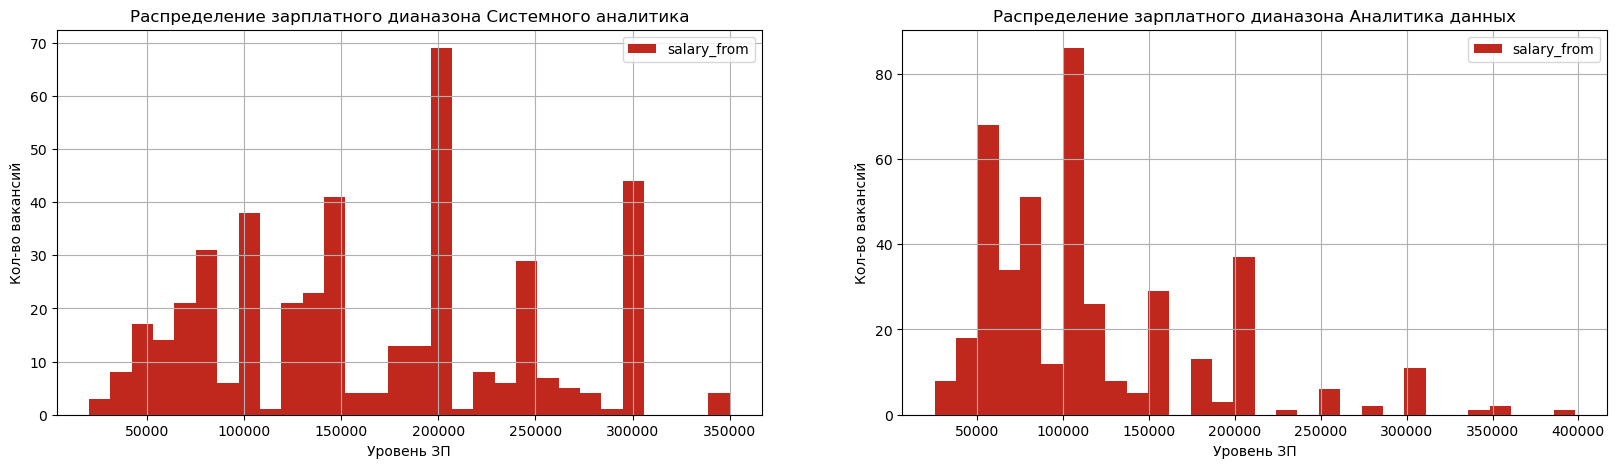

In [27]:
#сначала простая визуализация в гистограмме
plt.figure(figsize=(20, 5))

sa_data.plot(
    y=['salary_from'],
    kind='hist',
    bins = 30,
    grid = True,
    ax=plt.subplot(1, 2, 1),
    color = "#C0281E",
    title = "Распределение зарплатного дианазона Системного аналитика"
)
plt.xlabel('Уровень ЗП')
plt.ylabel('Кол-во вакансий')

da_data.plot(
    y=['salary_from'],
    kind='hist',
    bins = 30,
    grid = True,
    ax=plt.subplot(1, 2, 2),
    color = "#C0281E",
    title = "Распределение зарплатного дианазона Аналитика данных"
)
plt.xlabel('Уровень ЗП')
plt.ylabel('Кол-во вакансий')

plt.show()

Уже сейчас видно, что у АД стартовые позиции более востребованы, очень много вакансий с ЗП в диапазоне 50-100к рублей. У СА в этом плане тоже заметно спрос на молодых специалистов, но при этом заметны также вакансии на более высоких уровнях ЗП - 150/200/250/300.

Также можно отметить, что зарплаты в большинстве определяются как будто бы с шагом в 50к руб.

Немного уточним эту визуализацию по грейдам, чтобы лучше сравнить вилки.

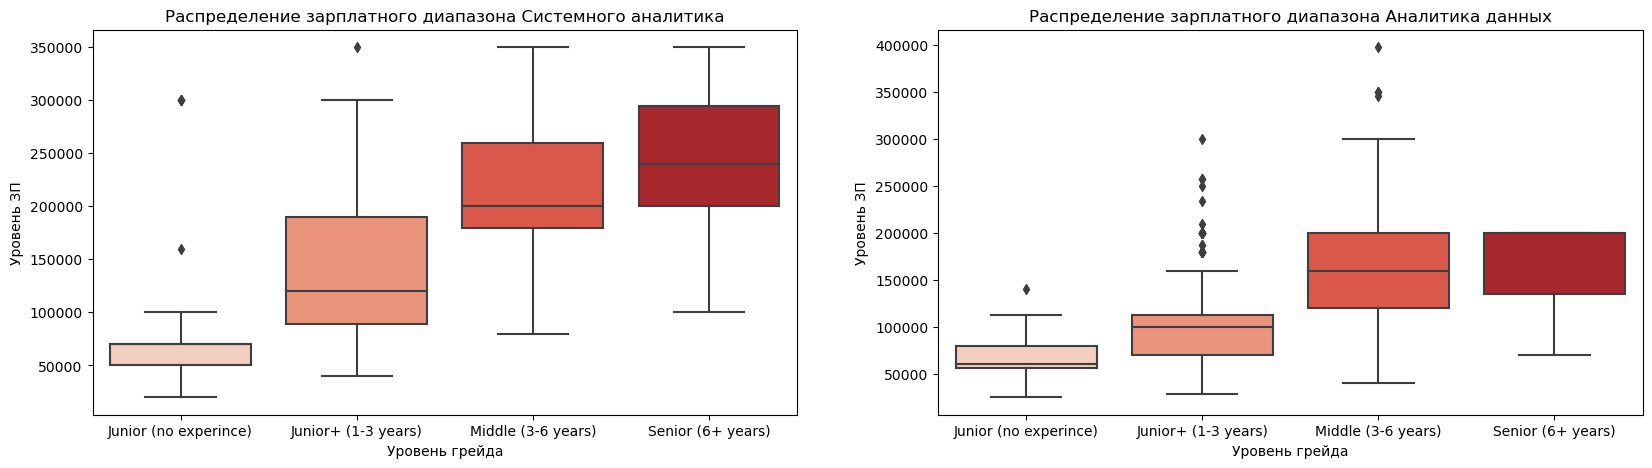

In [28]:
# Упорядочим категории опыта
experience_order = ['Junior (no experince)', 'Junior+ (1-3 years)','Middle (3-6 years)', 'Senior (6+ years)']
# Создайте копии DataFrame для предотвращения SettingWithCopyWarning
sa_data1 = sa_data.copy()
da_data1 = da_data.copy()

# Приведение столбца experience к категориальному типу с указанием порядка
sa_data1['experience'] = pd.Categorical(sa_data1['experience'], categories=experience_order, ordered=True)
da_data1['experience'] = pd.Categorical(da_data1['experience'], categories=experience_order, ordered=True)

plt.figure(figsize=(20, 5))

# Первый график для данных Системного аналитика
plt.subplot(1, 2, 1)
sns.boxplot(
    x='experience',
    y='salary_from',
    data=sa_data1,
    palette='Reds',
    order=experience_order 
)
plt.title("Распределение зарплатного диапазона Системного аналитика")
plt.grid(False)
plt.xlabel('Уровень грейда')
plt.ylabel('Уровень ЗП')

# Второй график для данных Аналитика данных
plt.subplot(1, 2, 2)
sns.boxplot(
    x='experience',
    y='salary_from',
    data=da_data1,
    palette='Reds',
    order=experience_order 
)
plt.title("Распределение зарплатного диапазона Аналитика данных")
plt.grid(False)
plt.xlabel('Уровень грейда')
plt.ylabel('Уровень ЗП')

plt.show()

Итого мы видим насколько разнится зарплатная вилка по грейдам у разных специалистов: уже на уровне миддла СА получает около 90-200к рублей, когда АД  - всего 70-120к рублей. Также, заметно, что уровень максимальной ЗП синьора не превышает 200к у АД, а СА доходит до 300к.
Однако следует уточнить, что часть данных имеет выбросы и данные могут быть неполными, что может отражать неполную картину для зарплатной вилки.

#### График работы и тип занятости

Предполагается, что часть соискателей могли бы хотеть удаленную работу с гибким графиком (ходят такие слухи) - проверим

In [29]:
labor_schedule = data.pivot_table(index=['source', 'employment', 'experience'], 
                                   columns='schedule', 
                                   aggfunc='size', 
                                   fill_value=0)

# Для визуализации с градиентом
labor_schedule.style.background_gradient(cmap='Reds')

Интересные наблюдения:
1. Больше всего вакансий требуют полную занятость, что особенно важно для джунов - чем старше грейд, тем больше доля удаленки от общего числа вакансий. У СА, в целом, больше возможностей по удаленке, чем у АД.
2. Наименее популярен сменный график (но факт его наличия уже удивляет)
3. На стажировку у аналитиков данных ходят даже кандидаты с опытом

#### Географическое распределение 

In [30]:
# еще раз приведем для справки количество вакансий по регионам:
print('Количество регионов:', len(data['area'].unique()))
print(sep)
print('Распределение:')
print(data['area'].value_counts().head(10))

Количество регионов: 106
------------------------------
Распределение:
Москва             2381
Санкт-Петербург     404
Екатеринбург        111
Новосибирск          82
Казань               80
Нижний Новгород      66
Краснодар            51
Владивосток          42
Самара               40
Ростов-на-Дону       34
Name: area, dtype: int64


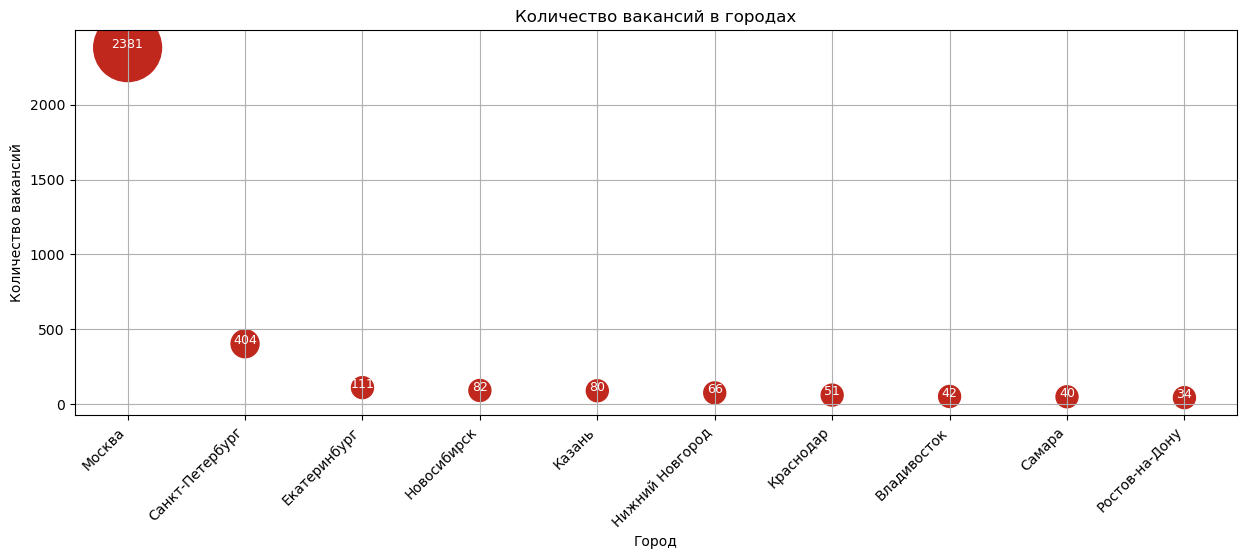

In [31]:
# построим пузырьки для визуализации
top10cities = {
    'Город': ['Москва', 'Санкт-Петербург', 'Екатеринбург', 'Новосибирск', 'Казань', 
              'Нижний Новгород', 'Краснодар', 'Владивосток', 'Самара', 'Ростов-на-Дону'],
    'Количество': [2381, 404, 111, 82, 80, 66, 51, 42, 40, 34]}
df = pd.DataFrame(top10cities)

# Установка минимального размера пузырьков
min_size = 250  # Минимальный размер пузырька

# Добавляем смещение для маленьких пузырьков
df['Adjusted_Количество'] = df['Количество'].apply(lambda x: x + 10 if x < 100 else x)

plt.figure(figsize=(15, 5))
plt.scatter(df['Город'], df['Adjusted_Количество'], s=[max(size, min_size) for size in df['Количество']], color='#C0281E')

# Добавление подписей
for i in range(len(df)):
    plt.text(df['Город'][i], df['Adjusted_Количество'][i], df['Количество'][i], fontsize=9, ha='center', color='#FFFFFF')

plt.title('Количество вакансий в городах')
plt.xlabel('Город')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [32]:
#посмотрим разделение по специальности, городам и зарплатам
regions_data = data.pivot_table(index=['source', 'area'], values=['id', 'salary_from'], aggfunc=('count', 'mean')).reset_index()
regions_data.columns = ['Специальность', 'Город', 'Кол-во вакансий', 'tmp1', 'tmp2', 'Средняя ЗП (нижний порог)']
regions_data.drop(['tmp1', 'tmp2'], axis=1, inplace=True)

# Сортировка по количеству вакансий
regions_data = regions_data.sort_values(by=['Кол-во вакансий', 'Средняя ЗП (нижний порог)'], ascending=[False, False]) 
#на графике поменяю тип сортировки, тут необходимо так сохранить, чтобы видеть статистически значимые по кол-ву вакансий города

# Отображение первых 20 позиций по кол-ву вакансий 
regions_data.head(20).style.format({'Средняя ЗП (нижний порог)': lambda x: f'{x:,.0f}'.replace(',', ' ')}) \
                          .background_gradient(subset=['Средняя ЗП (нижний порог)'], cmap='coolwarm')

,Специальность,Город,Кол-во вакансий,Средняя ЗП (нижний порог)
34,Аналитик данных,Москва,1247,131 331
108,Системный аналитик,Москва,1134,199 091
127,Системный аналитик,Санкт-Петербург,223,172 289
50,Аналитик данных,Санкт-Петербург,181,117 004
86,Системный аналитик,Екатеринбург,60,121 701
92,Системный аналитик,Казань,51,148 750
17,Аналитик данных,Екатеринбург,51,79 616
114,Системный аналитик,Новосибирск,49,120 833
112,Системный аналитик,Нижний Новгород,33,115 000
38,Аналитик данных,Нижний Новгород,33,104 099


1. Подавляющее большинство вакансий предполагают работу в Москве, в качестве дополнительных субъектов для анализа можно было бы добавить в срез Санкт-Петербург, Екатеринбург и Казань
2. Если брать "среднее по больнице", то ожидаемо в Москве и Питере уровень зарплат выше, чем в остальных регионах 
3. Также высоко ценятся системные анлитики в Казани и Ростове-на-Дону, а хуже всего в ключевых локациях оценивают труд системного аналитика в Перми

#### Работодатели

In [33]:
data['employer'].value_counts()

СБЕР                          338
Т1                            106
Aston                          66
WILDBERRIES                    51
Ozon                           40
                             ... 
Ай Девелоп Ит                   1
Фомин Сергей Александрович      1
НТР                             1
Фирма Светец                    1
Почта России                    1
Name: employer, Length: 1358, dtype: int64

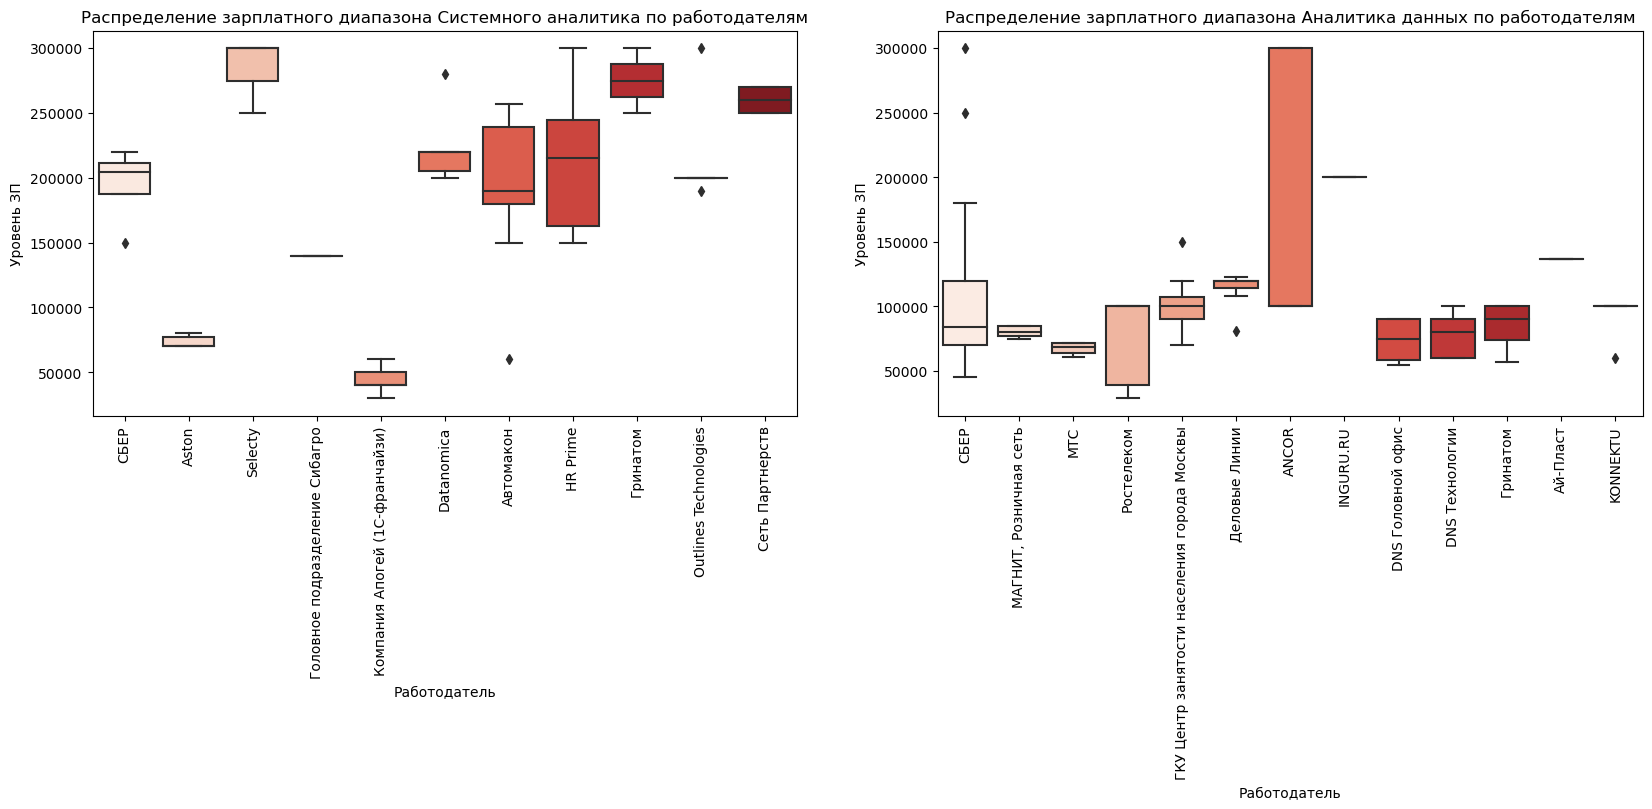

In [34]:
# Выделим топ-50 работодателей по количеству вакансий
sa_top_employer_names = sa_data['employer'].value_counts().head(50).index
da_top_employer_names = da_data['employer'].value_counts().head(50).index

# Фильтрация данных, чтобы убрать строки без указанных зарплат
sa_filtered_data = sa_data.dropna(subset=['salary_from'])
tmp_sa = sa_filtered_data['employer'].value_counts().head(50).index
sa_top_employer_names = sa_top_employer_names[sa_top_employer_names.isin(tmp_sa)]

da_filtered_data = da_data.dropna(subset=['salary_from'])
tmp_da = da_filtered_data['employer'].value_counts().head(50).index
da_top_employer_names = da_top_employer_names[da_top_employer_names.isin(tmp_da)]

plt.figure(figsize=(20, 5))

# Первый график для данных Системного аналитика
plt.subplot(1, 2, 1)
sns.boxplot(
    x='employer',
    y='salary_from',
    data=sa_filtered_data,
    palette='Reds',
    order=sa_top_employer_names
)
plt.title("Распределение зарплатного диапазона Системного аналитика по работодателям")
plt.grid(False)
plt.xlabel('Работодатель')
plt.ylabel('Уровень ЗП')
plt.xticks(rotation=90)

# Второй график для данных Аналитика данных
plt.subplot(1, 2, 2)
sns.boxplot(
    x='employer',
    y='salary_from',
    data=da_filtered_data,
    palette='Reds',
    order=da_top_employer_names
)
plt.title("Распределение зарплатного диапазона Аналитика данных по работодателям")
plt.grid(False)
plt.xlabel('Работодатель')
plt.ylabel('Уровень ЗП')
plt.xticks(rotation=90)

plt.show()

Больше всего вакансий размещает Сбер, при этом у него не самые высокие зарплаты (из указанных на сайте).
На втором месте - разработчик программного обеспечения Астон, который предлагает крайне низкие зарплаты (или ищет только джуниор сотрудников), третье место достается экосистеме МТС.
- Самые высокие зарплаты СА предлагает Selecty (ИТ-аутсорсинг), Гринатом (дочка Росатома), HR Prime (видимо от лица своих клиентов) и Автомакон (автоматизация под ключ)
- Самые высокие зарплаты АД у HR-агенства ANCOR, Сбера и сервиса INGURU.RU

#### Бонус: Анализ времени размещения публикаций о вакансиях и динамика спроса на специалистов

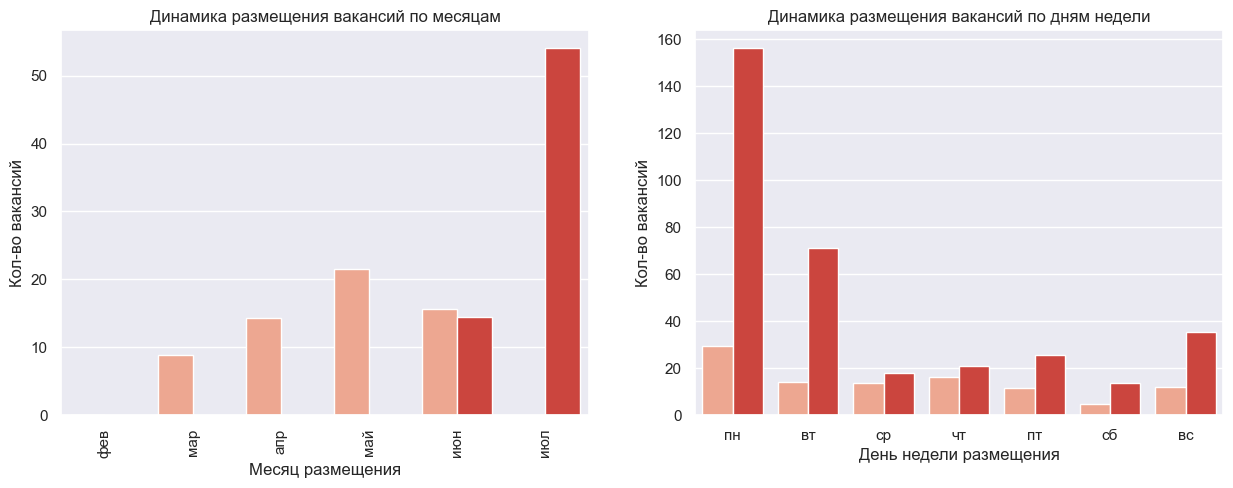

In [35]:
date_pivot = data.pivot_table(index = ('source','m','wd') , values = 'salary_from', aggfunc = ('count', 'mean', 'median')).reset_index()
date_pivot.columns = ['source', 'm', 'wd', 'count', 'mean_salary', 'median_salary']

#необходимо задать порядок дней недели, чтобы не попутать график
day_order = ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс']
date_pivot['wd'] = pd.Categorical(date_pivot['wd'], categories=day_order, ordered=True)

sns.set(rc={'figure.figsize': (15, 5)})

# Построение первого графика (по месяцам)
plt.subplot(1, 2, 1)
sns.barplot(x='m', y='count', hue='source', data=date_pivot, palette='Reds', errorbar=None).legend_.remove()
plt.title('Динамика размещения вакансий по месяцам')
plt.xlabel('Месяц размещения')
plt.ylabel('Кол-во вакансий')
date_labels = ['фев', 'мар', 'апр', 'май', 'июн', 'июл']
plt.xticks(range(0, 6), date_labels, rotation=90)


# Построение второго графика (по дням недели)
plt.subplot(1, 2, 2)
sns.barplot(x='wd', y='count', hue='source', data=date_pivot, palette='Reds', errorbar=None, order=day_order).legend_.remove()
plt.title('Динамика размещения вакансий по дням недели')
plt.xlabel('День недели размещения')
plt.ylabel('Кол-во вакансий')


plt.show()

Больше всего вакансий было размещено в июле для позиций системного аналитика, аналитики данных требуются постоянно и ежемесячно публикуется не менее 10 вакансий.
Ожидаемо, большинство вакансий у обеих специальностей размещаются в понедельник, и часть - во вторник.

**ИТОГО выводы по разделу Общие наблюдения**

- Относительно одинаковые условия по типу занятости и трудоустройства
- Есть разнообразие работодателей и зарплатных условий
- У СА зарплаты выше
- У СА более высокие зарплаты по регионам

###  Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом

*Note: тут непонятно задание само по себе, если честно - как я это поняла, надо просто в одно слово выдать джун/мидл/синьор, но проверим с названием*

In [36]:
# Добавляем поле 'grade' с пустыми значениями
data['grade'] = np.nan

# Функция для определения значения 'grade'
def set_grade(row):
    # Проверка наименования должности
    job_title = row['name'].lower()
    if any(keyword in job_title for keyword in ['senior', 'lead', 'главный', 'начальник', 'директор', 'chief']):
        return 'Senior'
    elif any(keyword in job_title for keyword in ['middle', 'ведущий', 'старший']):
        return 'Middle'
    elif 'junior+' in job_title:
        return 'Junior+'
    elif any(keyword in job_title for keyword in ['junior', 'стажер', 'intern']):
        return 'Junior'

    # Проверка опыта работы
    experience = row['experience'].lower()
    if 'senior' in experience:
        return 'Senior'
    elif 'middle' in experience:
        return 'Middle'
    elif 'junior+' in experience:
        return 'Junior+'
    elif 'junior' in experience:
        return 'Junior'

    # В случае, если не удалось определить грейд
    return 'Undefined'

# Применяем функцию к каждому ряду
data['grade'] = data.apply(set_grade, axis=1)

# Просмотр первых строк для проверки
display(data[['name', 'experience', 'grade']].head(30))

,name,experience,grade
0,Системный аналитик,Middle (3-6 years),Middle
1,Бизнес/Системный Аналитик,Junior+ (1-3 years),Junior+
2,Системный IT аналитик,Junior+ (1-3 years),Junior+
3,Системный Аналитик ERP-решений,Senior (6+ years),Senior
4,Системный аналитик,Junior+ (1-3 years),Junior+
5,Системный аналитик ЦФТ-Банк,Junior+ (1-3 years),Junior+
6,Системный аналитик 1С ERP,Junior+ (1-3 years),Junior+
7,Системный аналитик,Junior+ (1-3 years),Junior+
8,Системный аналитик АБС в Банк,Junior+ (1-3 years),Junior+
9,Системный аналитик / горный инженер (геолог/те...,Junior+ (1-3 years),Junior+


Выглядит так, будто мы могли спокойно использовать колонку experience все это время, так что дальше скипанем эти результаты, если специально не требуется :(

###    Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик.

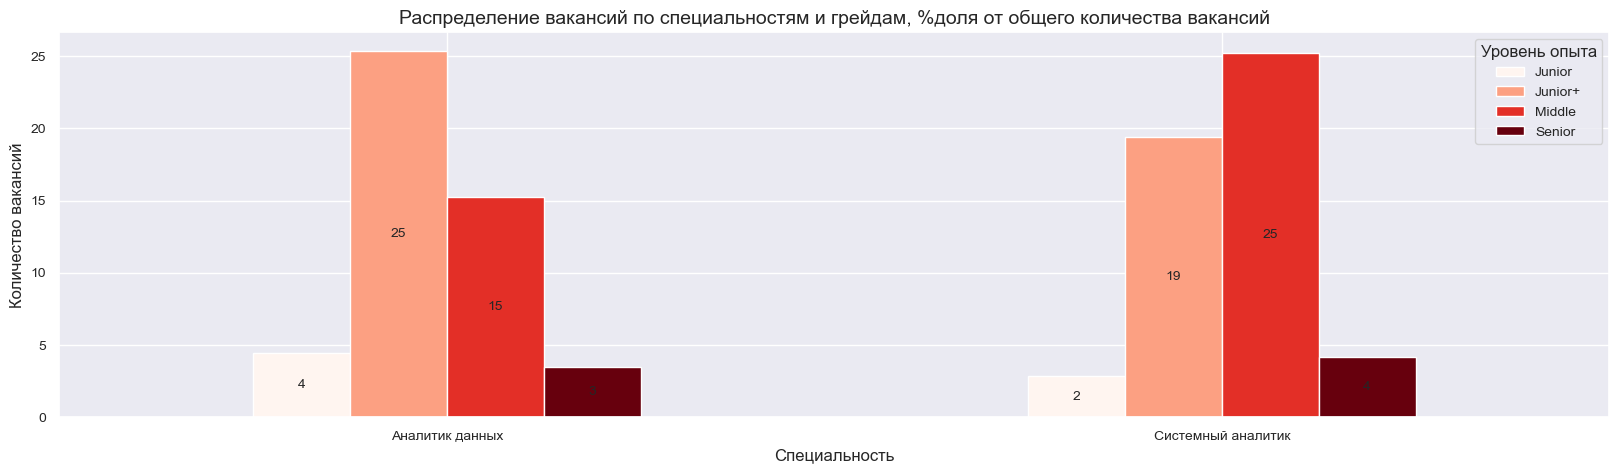

In [37]:
# сгруппируем вакансии по специальностям и грейдам:
data_group_grade = data.groupby(['source', 'grade']).size().unstack()/3711*100

ax = data_group_grade.plot(kind='bar', figsize=(20, 5), cmap = 'Reds')

plt.title('Распределение вакансий по специальностям и грейдам, %доля от общего количества вакансий', fontsize=14)
plt.xlabel('Специальность', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
ax.legend(title='Уровень опыта', fontsize=10, title_fontsize=12)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center',
                fontsize=10)

plt.show()

###   Определение типичного места работы для Аналитика данных и Системного аналитика по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior

In [38]:
#работодатели
employers_grade = data.pivot_table(index=['source', 'grade', 'employer'], values='id', aggfunc='count').reset_index()
employers_grade.columns = ['type','grade','employer','count_id']
employers_grade = employers_grade.sort_values(by=['type','grade','count_id'], ascending=[True, True, False])
top5_per_employer_group = employers_grade.groupby(['type', 'grade']).head(5)

print(top5_per_employer_group)

                    type    grade                         employer  count_id
88       Аналитик данных   Junior                             СБЕР        17
64       Аналитик данных   Junior           МАГНИТ, Розничная сеть         7
12       Аналитик данных   Junior                   DNS Технологии         4
72       Аналитик данных   Junior                 Московская Биржа         4
94       Аналитик данных   Junior     Согласие, страховая компания         4
426      Аналитик данных  Junior+                             СБЕР       129
247      Аналитик данных  Junior+                   Банк ВТБ (ПАО)        21
179      Аналитик данных  Junior+                             Ozon        17
177      Аналитик данных  Junior+                             Okko        12
422      Аналитик данных  Junior+                       Ростелеком        12
730      Аналитик данных   Middle                             СБЕР        73
610      Аналитик данных   Middle                      WILDBERRIES        26

In [39]:
#зарплата
salary_grade = data.pivot_table(index=['source', 'grade' ], values='salary_from', aggfunc=('min','mean','max')).reset_index()
salary_grade.columns = ['type','grade','salary_from_max','salary_from_mean','salary_from_min']

salary_grade

,type,grade,salary_from_max,salary_from_mean,salary_from_min
0,Аналитик данных,Junior,140000.0,66822.847222,25000.0
1,Аналитик данных,Junior+,300000.0,100607.256637,28940.0
2,Аналитик данных,Middle,398000.0,159116.157407,40000.0
3,Аналитик данных,Senior,345950.0,179478.125000,60000.0
4,Системный аналитик,Junior,300000.0,75289.830508,20000.0
5,Системный аналитик,Junior+,350000.0,135688.071429,43000.0
6,Системный аналитик,Middle,350000.0,205434.649215,45000.0
7,Системный аналитик,Senior,350000.0,231546.875000,100000.0


In [40]:
#тип занятости и график работы
labour_grade = data.pivot_table(index=['source', 'grade', 'schedule','employment'], values='id', aggfunc='count').reset_index()
labour_grade.columns = ['type','grade','labour','employment','count_id']
labour_grade = labour_grade.sort_values(by=['type','grade','count_id'], ascending=[True, True, False])
top5_per_labour_group = labour_grade.groupby(['type', 'grade']).head(5)

print(top5_per_labour_group)

                  type    grade            labour           employment  \
3      Аналитик данных   Junior       Полный день     Полная занятость   
7      Аналитик данных   Junior  Удаленная работа     Полная занятость   
4      Аналитик данных   Junior       Полный день           Стажировка   
9      Аналитик данных   Junior  Удаленная работа           Стажировка   
1      Аналитик данных   Junior     Гибкий график           Стажировка   
12     Аналитик данных  Junior+       Полный день     Полная занятость   
16     Аналитик данных  Junior+  Удаленная работа     Полная занятость   
11     Аналитик данных  Junior+     Гибкий график     Полная занятость   
15     Аналитик данных  Junior+    Сменный график     Полная занятость   
14     Аналитик данных  Junior+       Полный день  Частичная занятость   
22     Аналитик данных   Middle       Полный день     Полная занятость   
23     Аналитик данных   Middle  Удаленная работа     Полная занятость   
19     Аналитик данных   Middle     Ги

**Выводы по анализу грейдов**

1. СБЕР активно набирает джунов с опытом в оба направления
2. Чем старше грейд, тем меньше ищут специалистов. Исключение - стажеры и младшие специалисты без опыта, их тоже мало куда хотят рассматривать
3. Средний уровень ЗП на всех грейдах выше у Системных аналитиков, но максимальные уровни более менее сходятся с Аналитиками данных
4. По типу занятости и графику работы - всех хотят на полную занятость, местами у СА больше возможностей для удаленки

###   Определение,  какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.

In [41]:
# Функция для добавления подписей на столбцы
def add_labels(ax, counts, skills):
    for i, (count, skill) in enumerate(zip(counts, skills)):
        ax.text(count/2, i, skill, color='black', ha='center', va='center')

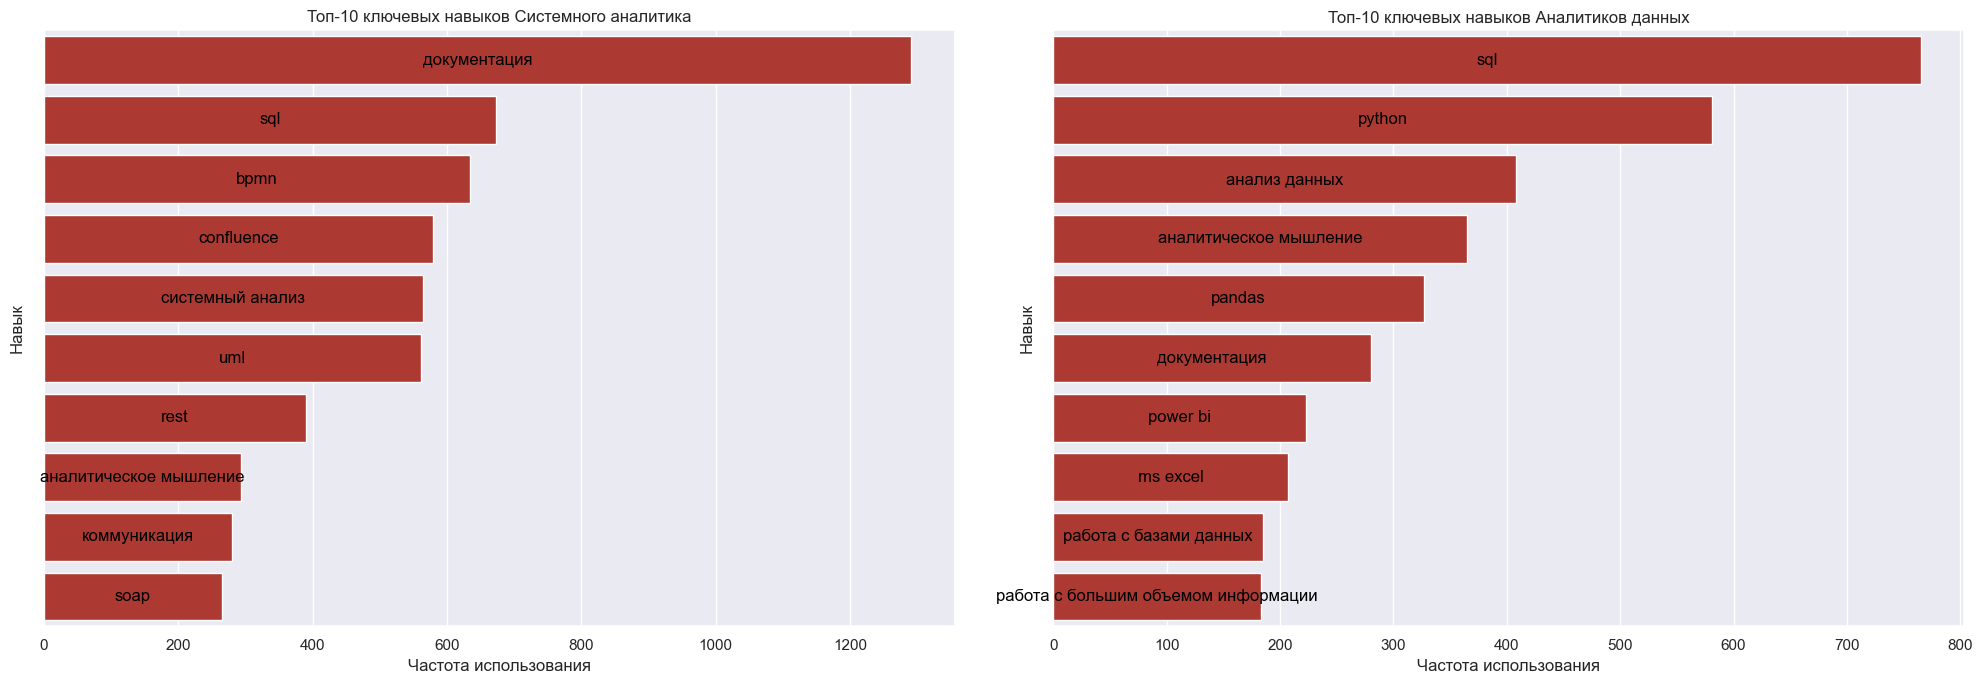

In [42]:
# Создание списков навыков и подсчёт их частот
sa_skills = sum(sa_data['key_skills'], [])
sa_skill_counts = Counter(sa_skills)
sa_most_common_skills = sa_skill_counts.most_common(10)  # выберем топ-10 наиболее распространённых навыков
sa_skills, sa_counts = zip(*sa_most_common_skills) # Разделение данных на навыки и их частоты для визуализации


da_skills = sum(da_data['key_skills'], [])
da_skill_counts = Counter(da_skills)
da_most_common_skills = da_skill_counts.most_common(10)  # выберем топ-10 наиболее распространённых навыков
da_skills, da_counts = zip(*da_most_common_skills) # Разделение данных на навыки и их частоты для визуализации


sns.set(rc={'figure.figsize': (20, 7)})

plt.subplot(1, 2, 1)
ax01 = sns.barplot(x=list(sa_counts), y=list(sa_skills), color="#C0281E")
plt.title('Топ-10 ключевых навыков Системного аналитика')
plt.xlabel('Частота использования')
plt.ylabel('Навык')
ax01.set_yticklabels([])  # Убираем подписи с оси Y
add_labels(ax01, sa_counts, sa_skills)

plt.subplot(1, 2, 2)
ax02= sns.barplot(x=list(da_counts), y=list(da_skills), color="#C0281E")
plt.title('Топ-10 ключевых навыков Аналитиков данных')
plt.xlabel('Частота использования')
plt.ylabel('Навык')
ax02.set_yticklabels([])  # Убираем подписи с оси Y
add_labels(ax02, da_counts, da_skills)
plt.tight_layout()
plt.show()

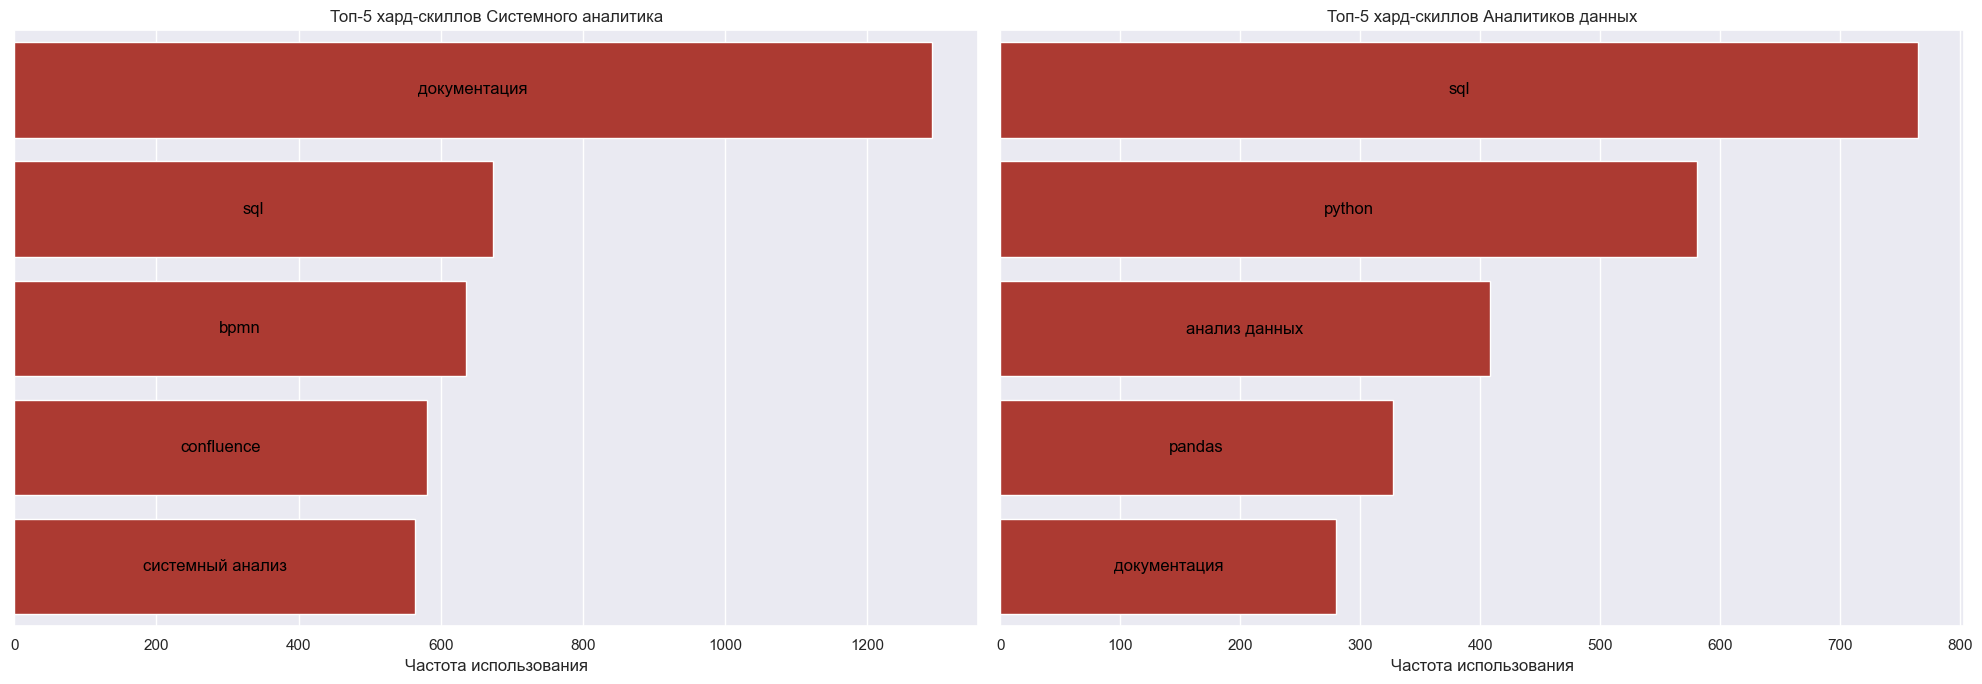

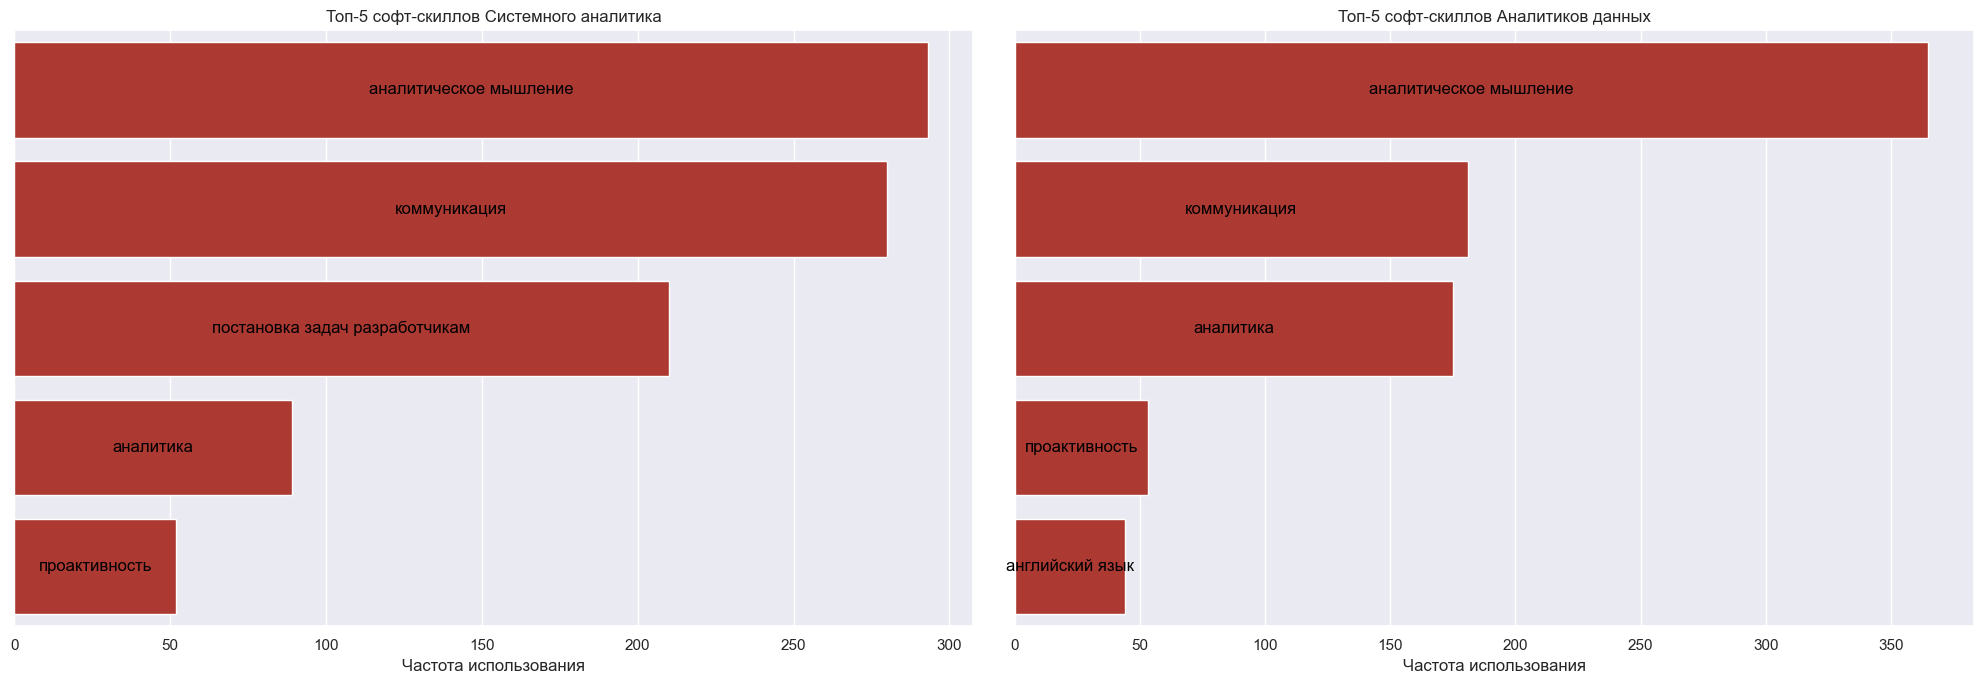

In [43]:
# Создание списков навыков и подсчёт их частот
sa_hard_skills = sum(sa_data['hard_skills'], [])
sa_hard_skill_counts = Counter(sa_hard_skills)
sa_most_common_hard_skills = sa_hard_skill_counts.most_common(5)  # выберем топ-5 наиболее распространённых навыков
sa_hard_skills, sa_hard_counts = zip(*sa_most_common_hard_skills) # Разделение данных на навыки и их частоты для визуализации

da_hard_skills = sum(da_data['hard_skills'], [])
da_hard_skill_counts = Counter(da_hard_skills)
da_most_common_hard_skills = da_hard_skill_counts.most_common(5)  # выберем топ-5 наиболее распространённых навыков
da_hard_skills, da_hard_counts = zip(*da_most_common_hard_skills) # Разделение данных на навыки и их частоты для визуализации


sa_soft_skills = sum(sa_data['soft_skills'], [])
sa_soft_skill_counts = Counter(sa_soft_skills)
sa_most_common_soft_skills = sa_soft_skill_counts.most_common(5)  # выберем топ-5 наиболее распространённых навыков
sa_soft_skills, sa_soft_counts = zip(*sa_most_common_soft_skills) # Разделение данных на навыки и их частоты для визуализации

da_soft_skills = sum(da_data['soft_skills'], [])
da_soft_skill_counts = Counter(da_soft_skills)
da_most_common_soft_skills = da_soft_skill_counts.most_common(5)  # выберем топ-5 наиболее распространённых навыков
da_soft_skills, da_soft_counts = zip(*da_most_common_soft_skills) # Разделение данных на навыки и их частоты для визуализации


# Построение графиков для хард-скиллов
sns.set(rc={'figure.figsize': (20, 7)})

plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=list(sa_hard_counts), y=list(sa_hard_skills), color="#C0281E")
plt.title('Топ-5 хард-скиллов Системного аналитика')
plt.xlabel('Частота использования')
plt.ylabel('')
ax1.set_yticklabels([])
add_labels(ax1, sa_hard_counts, sa_hard_skills)

plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=list(da_hard_counts), y=list(da_hard_skills), color="#C0281E")
plt.title('Топ-5 хард-скиллов Аналитиков данных')
plt.xlabel('Частота использования')
plt.ylabel('')
ax2.set_yticklabels([])
add_labels(ax2, da_hard_counts, da_hard_skills)

plt.tight_layout()
plt.show()

# Построение графиков для софт-скиллов
sns.set(rc={'figure.figsize': (20, 7)})

plt.subplot(1, 2, 1)
ax3 = sns.barplot(x=list(sa_soft_counts), y=list(sa_soft_skills), color="#C0281E")
plt.title('Топ-5 софт-скиллов Системного аналитика')
plt.xlabel('Частота использования')
plt.ylabel('')
ax3.set_yticklabels([])
add_labels(ax3, sa_soft_counts, sa_soft_skills)

plt.subplot(1, 2, 2)
ax4 = sns.barplot(x=list(da_soft_counts), y=list(da_soft_skills), color="#C0281E")
plt.title('Топ-5 софт-скиллов Аналитиков данных')
plt.xlabel('Частота использования')
plt.ylabel('')
ax4.set_yticklabels([])
add_labels(ax4, da_soft_counts, da_soft_skills)

plt.tight_layout()
plt.show()

###   Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.


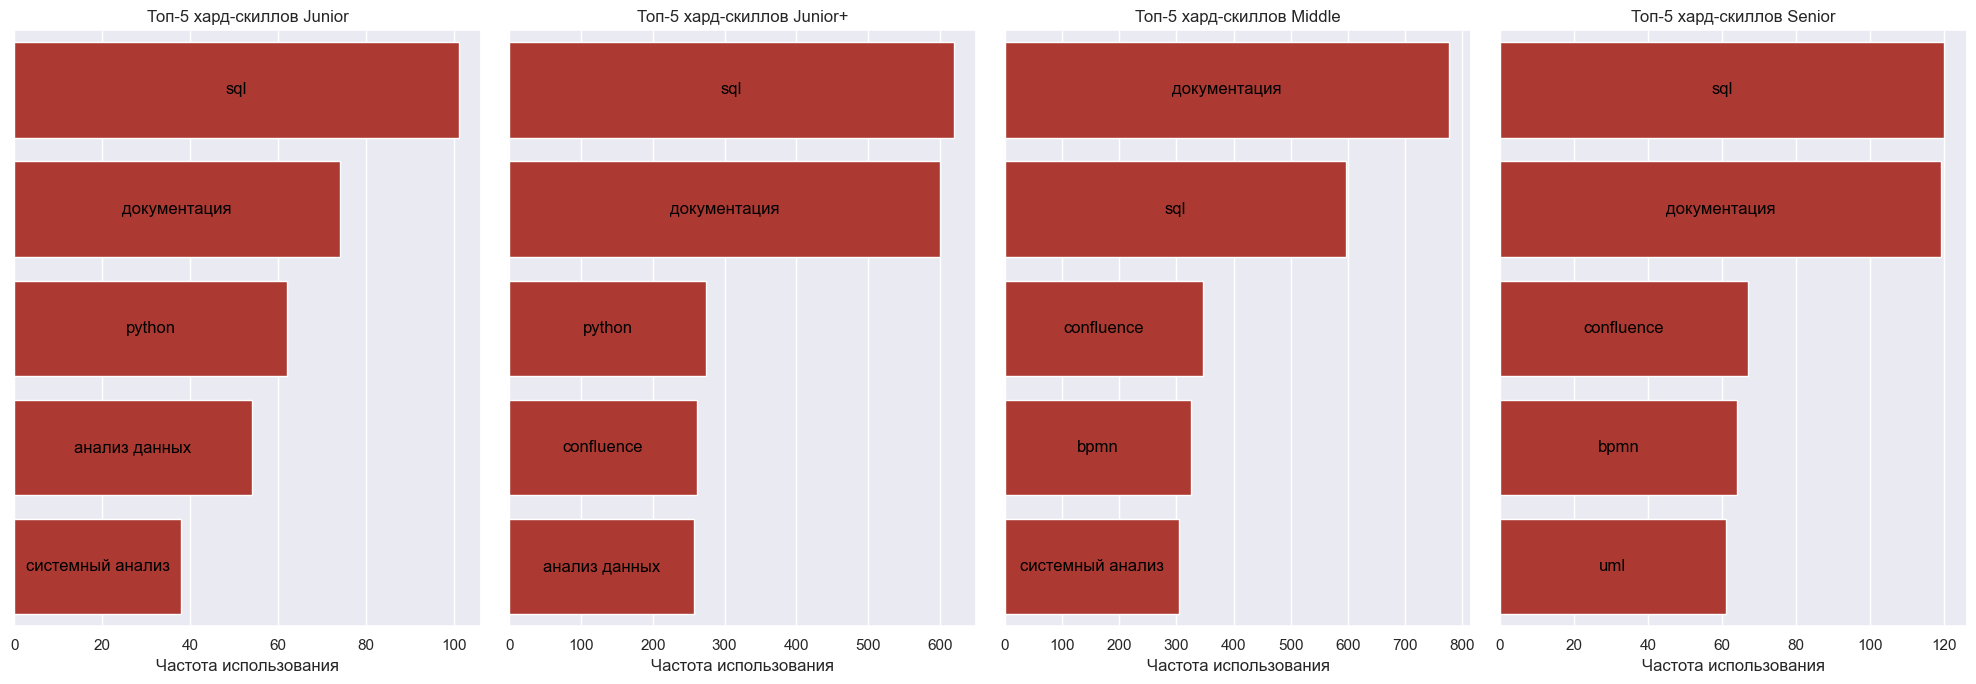

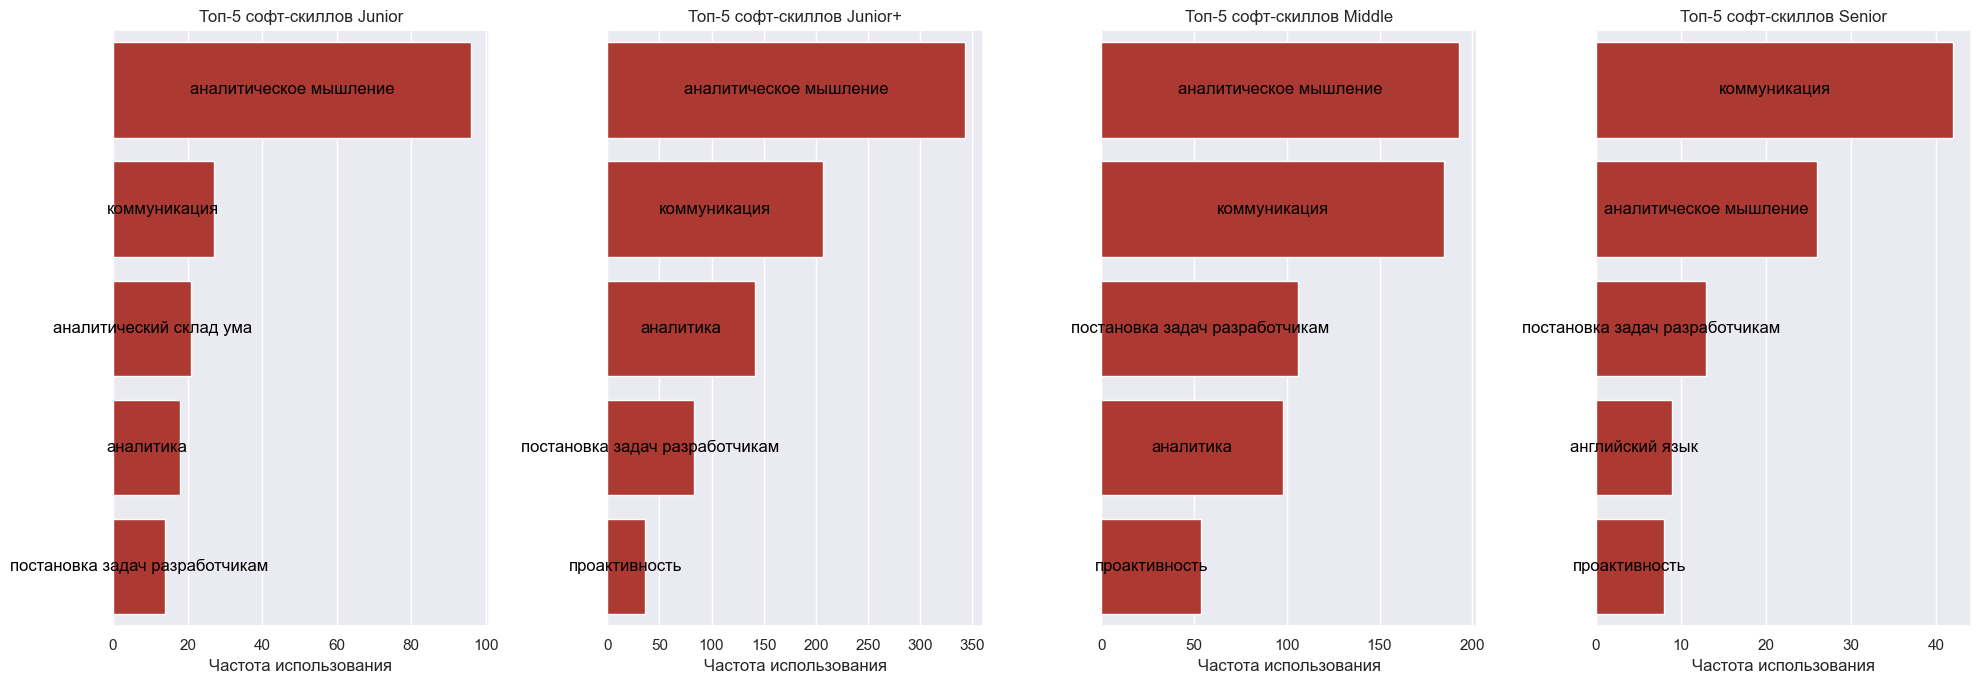

In [44]:
intern_data = data.query('grade == "Junior"')
junior_data = data.query('grade == "Junior+"')
middle_data = data.query('grade == "Middle"')
senior_data = data.query('grade == "Senior"')

# Создание списков навыков и подсчёт их частот
i_hard_skills = sum(intern_data['hard_skills'], [])
i_hard_skill_counts = Counter(i_hard_skills)
i_most_common_hard_skills = i_hard_skill_counts.most_common(5)  # выберем топ-5 наиболее распространённых навыков
i_hard_skills, i_hard_counts = zip(*i_most_common_hard_skills) # Разделение данных на навыки и их частоты для визуализации

j_hard_skills = sum(junior_data['hard_skills'], [])
j_hard_skill_counts = Counter(j_hard_skills)
j_most_common_hard_skills = j_hard_skill_counts.most_common(5)  # выберем топ-5 наиболее распространённых навыков
j_hard_skills, j_hard_counts = zip(*j_most_common_hard_skills) # Разделение данных на навыки и их частоты для визуализации

m_hard_skills = sum(middle_data['hard_skills'], [])
m_hard_skill_counts = Counter(m_hard_skills)
m_most_common_hard_skills = m_hard_skill_counts.most_common(5)  # выберем топ-5 наиболее распространённых навыков
m_hard_skills, m_hard_counts = zip(*m_most_common_hard_skills) # Разделение данных на навыки и их частоты для визуализации

s_hard_skills = sum(senior_data['hard_skills'], [])
s_hard_skill_counts = Counter(s_hard_skills)
s_most_common_hard_skills = s_hard_skill_counts.most_common(5)  # выберем топ-5 наиболее распространённых навыков
s_hard_skills, s_hard_counts = zip(*s_most_common_hard_skills) # Разделение данных на навыки и их частоты для визуализации

# Построение графиков для хард-скиллов
sns.set(rc={'figure.figsize': (20, 7)})

plt.subplot(1, 4, 1)
ax001 = sns.barplot(x=list(i_hard_counts), y=list(i_hard_skills), color="#C0281E")
plt.title('Топ-5 хард-скиллов Junior')
plt.xlabel('Частота использования')
plt.ylabel('')
ax001.set_yticklabels([])
add_labels(ax001, i_hard_counts, i_hard_skills)

plt.subplot(1, 4, 2)
ax002 = sns.barplot(x=list(j_hard_counts), y=list(j_hard_skills), color="#C0281E")
plt.title('Топ-5 хард-скиллов Junior+')
plt.xlabel('Частота использования')
plt.ylabel('')
ax002.set_yticklabels([])
add_labels(ax002, j_hard_counts, j_hard_skills)

plt.subplot(1, 4, 3)
ax003 = sns.barplot(x=list(m_hard_counts), y=list(m_hard_skills), color="#C0281E")
plt.title('Топ-5 хард-скиллов Middle')
plt.xlabel('Частота использования')
plt.ylabel('')
ax003.set_yticklabels([])
add_labels(ax003, m_hard_counts, m_hard_skills)

plt.subplot(1, 4, 4)
ax004 = sns.barplot(x=list(s_hard_counts), y=list(s_hard_skills), color="#C0281E")
plt.title('Топ-5 хард-скиллов Senior')
plt.xlabel('Частота использования')
plt.ylabel('')
ax004.set_yticklabels([])
add_labels(ax004, s_hard_counts, s_hard_skills)

plt.tight_layout()
plt.show()



# Создание списков навыков и подсчёт их частот
i_soft_skills = sum(intern_data['soft_skills'], [])
i_soft_skill_counts = Counter(i_soft_skills)
i_most_common_soft_skills = i_soft_skill_counts.most_common(5)  # выберем топ-5 наиболее распространённых навыков
i_soft_skills, i_soft_counts = zip(*i_most_common_soft_skills) # Разделение данных на навыки и их частоты для визуализации

j_soft_skills = sum(junior_data['soft_skills'], [])
j_soft_skill_counts = Counter(j_soft_skills)
j_most_common_soft_skills = j_soft_skill_counts.most_common(5)  # выберем топ-5 наиболее распространённых навыков
j_soft_skills, j_soft_counts = zip(*j_most_common_soft_skills) # Разделение данных на навыки и их частоты для визуализации

m_soft_skills = sum(middle_data['soft_skills'], [])
m_soft_skill_counts = Counter(m_soft_skills)
m_most_common_soft_skills = m_soft_skill_counts.most_common(5)  # выберем топ-5 наиболее распространённых навыков
m_soft_skills, m_soft_counts = zip(*m_most_common_soft_skills) # Разделение данных на навыки и их частоты для визуализации

s_soft_skills = sum(senior_data['soft_skills'], [])
s_soft_skill_counts = Counter(s_soft_skills)
s_most_common_soft_skills = s_soft_skill_counts.most_common(5)  # выберем топ-5 наиболее распространённых навыков
s_soft_skills, s_soft_counts = zip(*s_most_common_soft_skills) # Разделение данных на навыки и их частоты для визуализации

# Построение графиков для софт-скиллов
sns.set(rc={'figure.figsize': (20, 7)})

plt.subplot(1, 4, 1)
ax005 = sns.barplot(x=list(i_soft_counts), y=list(i_soft_skills), color="#C0281E")
plt.title('Топ-5 софт-скиллов Junior')
plt.xlabel('Частота использования')
plt.ylabel('')
ax005.set_yticklabels([])
add_labels(ax005, i_soft_counts, i_soft_skills)

plt.subplot(1, 4, 2)
ax006 = sns.barplot(x=list(j_soft_counts), y=list(j_soft_skills), color="#C0281E")
plt.title('Топ-5 софт-скиллов Junior+')
plt.xlabel('Частота использования')
plt.ylabel('')
ax006.set_yticklabels([])
add_labels(ax006, j_soft_counts, j_soft_skills)

plt.subplot(1, 4, 3)
ax007 = sns.barplot(x=list(m_soft_counts), y=list(m_soft_skills), color="#C0281E")
plt.title('Топ-5 софт-скиллов Middle')
plt.xlabel('Частота использования')
plt.ylabel('')
ax007.set_yticklabels([])
add_labels(ax007, m_soft_counts, m_soft_skills)

plt.subplot(1, 4, 4)
ax008 = sns.barplot(x=list(s_soft_counts), y=list(s_soft_skills), color="#C0281E")
plt.title('Топ-5 софт-скиллов Senior')
plt.xlabel('Частота использования')
plt.ylabel('')
ax008.set_yticklabels([])
add_labels(ax008, s_soft_counts, s_soft_skills)

plt.tight_layout()
plt.show()

## Формулирование выводов и рекомендаций.

============================ Описание данных =================================

Данные были относительно чистые:
1. Неявных дубликатов в категориальных данных не оказалось, но оказались в списках навыков - список вычистили и на его базе составили новые столбцы с сигнификаторами ключевых хард-/софт-скиллов
2. Пропуски заполнии частично для зарплат - минимальным порогом в 60к. Остальные пропуски оказались достаточно материальны, чтобы отказаться от усреднения данных по меньшинству


Период анализа: 2024-02-13 - 2024-07-09

Общее кол-во вакансий: 3711

Количество вакансий по позиции:
- Системный аналитик    1915
- Аналитик данных       1801

Количество работодателей: 1358

============================ Ключевые выводы =================================

Направления Системный аналитик и Аналитик данных во многом схожи, но и имеют некоторыен отличия:

**Сходства:**
1. Схожие условия занятости и трудоустройства
2. Есть разнообразие работодателей и зарплатных условий
3. Своя специфика требуемых навыков и опыта в ПО

**Различия:**

1. Прежде всего в зарплате - СА получает сильно больше, чем АД
2. Набором ключевых навыков - если инструментарий СА базируется на SQL и специальном ПО, то АД необходимо помимо SQL еще знать питон и его основные библиотеки
3. Зарплаты по регионам также значительно отличаются у разных специальноситей

**============================ Как выглядит тот самый кандидат? =================================**

**Портрет типичного кандидата в СА:**
- Джуниор с опытом до 3 лет или Миддл с опытом от 3 до 6 лет
- Полная занятость на полный день с возможностью удаленки
- Средний уровень ЗП около 140-200к
- Кандидат отбора в финансовые организации или ИТ-холдинги
- Умеет работать с документацией, SQL, BPMN, Jira Confluence, а также имеет аналитический склад ума, хорош в коммуникации и постановке задач

**Портрет типичного кандидата в АД:**
- Джуниор+ или Миддл с опытом от 3 до 6 лет
- Полная занятость на полный день 
- Средний уровень ЗП около 100-160к
- Кандидат отбора в финсектор или сектор ТМТ
- Знает SQL, Python и его библиотеки, а также имеет аналитический склад ума, хорош в коммуникации и демонстрирует проактивный подход

**============================ Рекомендации =================================**

Соискателям: 
1. Оценить свой опыт и определиться с ожиданиями по уровню ЗП
2. В случае необходимости работать в проекте или удаленно - искать соответсвующие вакансии (особенно, для СА)
2. Отразить в резюме целевые навыки для желаемого направления
2. Мониторить новые объявления о вакансиях по вторникам

Работодателям:
1. Сверить зарплатные вилки с конкурентами
2. Более четко указывать минимальный и максимальный порог ЗП
3. Добавить более широкий перечень навыков для описания необходимого кандидата